<a href="https://colab.research.google.com/github/Gnani0825/Gnaneshwar_INFO5731_Fall2024/blob/main/Pendyala_Gnaneshwar_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import pandas as pd
import re
from collections import Counter, defaultdict
import nltk
from nltk import pos_tag, word_tokenize
from nltk.chunk import ne_chunk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [ ]:
file_path = 'gnaneshwar.csv'
df = pd.read_csv(file_path)
documents = df['review'].dropna().tolist()
def get_ngrams(text, n=3):
    words = text.lower().split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [' '.join(ngram) for ngram in ngrams]
al_trigramms = []
for doc in documents:
    al_trigramms.extend(get_ngrams(doc))

# Countingg  the frequency of all trigrams
tr_counts = Counter(al_trigramms)
print(tr_counts)


def get_bigrams(text):
    words = text.lower().split()
    bigrams = zip(words, words[1:])
    return [' '.join(bigram) for bigram in bigrams]
all_bigrams = []
for doc in documents:
    all_bigrams.extend(get_bigrams(doc))
def get_unigrams(text):
    words = text.lower().split()
    return words
all_unigrams = []
for doc in documents:
    all_unigrams.extend(get_unigrams(doc))
unigram_cou = Counter(all_unigrams)
bigram_cou= Counter(all_bigrams)
bigram_probabilities = {}
for bigram, count in bigram_cou.items():
    word1 = bigram.split()[0]
    word2 = bigram.split()[1]
    word1_count = unigram_cou[word1]
    bigram_probabilities[bigram] = count / word1_count if word1_count > 0 else 0
from itertools import islice
print("\nBigram probabil:")
for bigram, probability in islice(bigram_probabilities.items(), 100):
    print(f"{bigram}: {probability:.4f}")


In [ ]:
def extract_noun_phrases(text):
    words = word_tokenize(text)
    tagged = pos_tag(words)
    chunked = ne_chunk(tagged)

    noun_phrz = []
    for subtree in chunked:
        if isinstance(subtree, nltk.Tree):  # If it is a noun phrase
            noun_phrz.append(' '.join(word for word, tag in subtree))
    return noun_phrz
# Extracting noun phrases
al_non_phrases = []
for doc in documents:
    al_non_phrases.extend(extract_noun_phrases(doc))
noun_phrz_cou = Counter(al_non_phrases)
max_noun_phrase_count = max(noun_phrz_cou.values())
rel_freq = defaultdict(list)
for doc in documents:
    doc_noun_phrases = extract_noun_phrases(doc)
    doc_noun_phrase_count = Counter(doc_noun_phrases)
    for noun_phrase, count in noun_phrz_cou.items():
        relative_freq = doc_noun_phrase_count[noun_phrase] / max_noun_phrase_count if max_noun_phrase_count > 0 else 0
        rel_freq[noun_phrase].append(relative_freq)

# Converting the df to tableform
rel_freq_df = pd.DataFrame(rel_freq)
print("\nRelative Frequency of Noun Phrases for each Review:")
print(rel_freq_df.head(3))

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
import math
import pandas as pd
from collections import defaultdict
file_path = 'gnaneshwar.csv'
df = pd.read_csv(file_path)
documents = df['review'].dropna().tolist()
tf = []
for doc in documents:
    words = doc.lower().split()
    doc_tf = defaultdict(int)
    for word in words:
        doc_tf[word] += 1
    tf.append({word: count / len(words) for word, count in doc_tf.items()})
df = defaultdict(int)
for doc_tf in tf:
    for word in doc_tf:
        df[word] += 1
idf = {word: math.log(len(documents) / df[word]) for word in df}
# Calculating  TF-IDF
tf_idf_matrix = []
for doc_tf in tf:
    doc_tf_idf = {word: doc_tf[word] * idf[word] for word in doc_tf}
    tf_idf_matrix.append(doc_tf_idf)
for i, tf_idf in enumerate(tf_idf_matrix[:100]):
    print(f"Document {i+1}: {tf_idf}")






In [26]:
query = "An outstanding movie with a haunting performance and best character development"
query_wor = query.lower().split()
query_tf = defaultdict(int)
for word in query_wor:
    query_tf[word] += 1
query_tf = {word: count / len(query_wor) for word, count in query_tf.items()}
query_tf_idf = {word: query_tf[word] * idf.get(word, 0) for word in query_tf}
def cosine_similarity(vec1, vec2):
    intersek = set(vec1.keys()) & set(vec2.keys())
    numerator = sum(vec1[word] * vec2[word] for word in intersek)
    sum1 = sum(val**2 for val in vec1.values())
    sum2 = sum(val**2 for val in vec2.values())
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    return numerator / denominator if denominator != 0 else 0
#Ranking documents by cosine similarity
simmlar = []
for i, doc_tf_idf in enumerate(tf_idf_matrix):
    sim = cosine_similarity(query_tf_idf, doc_tf_idf)
    simmlar.append((i, sim))
ranked_docs = sorted(simmlar, key=lambda x: x[1], reverse=True)[:100]
print("Document rankings based on query similarity:")
for doc_index, sim in ranked_docs:
    print(f"Document {doc_index + 1}: Similarity = {sim:.4f}")

Document rankings based on query similarity:
Document 1081: Similarity = 0.1891
Document 786: Similarity = 0.1614
Document 435: Similarity = 0.1612
Document 1061: Similarity = 0.1477
Document 845: Similarity = 0.1357
Document 1178: Similarity = 0.1350
Document 1015: Similarity = 0.1322
Document 1596: Similarity = 0.1218
Document 709: Similarity = 0.1218
Document 986: Similarity = 0.1181
Document 674: Similarity = 0.1161
Document 228: Similarity = 0.1146
Document 946: Similarity = 0.1144
Document 1242: Similarity = 0.1134
Document 876: Similarity = 0.1133
Document 400: Similarity = 0.1075
Document 395: Similarity = 0.1059
Document 1362: Similarity = 0.1022
Document 1456: Similarity = 0.1018
Document 470: Similarity = 0.0992
Document 1108: Similarity = 0.0989
Document 1475: Similarity = 0.0959
Document 1408: Similarity = 0.0955
Document 1588: Similarity = 0.0954
Document 1355: Similarity = 0.0945
Document 1244: Similarity = 0.0923
Document 867: Similarity = 0.0919
Document 1445: Similari

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [29]:

import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')
file_path = 'gnaneshwar.csv'
df = pd.read_csv(file_path)
data = df['review'].dropna().tolist()
def preprocess_text(data):
    stop_wor = set(stopwords.words('english'))
    sent = []
    for text in data:
        text = re.sub(r'[^\w\s]', '', text.lower())
        words = [word for word in word_tokenize(text) if word not in stop_wor]
        sent.append(words)
    return sent
processed_data = preprocess_text(data)
sam_data = processed_data[:5]
print("Sample of tokenized and preprocessed data:", sam_data)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample of tokenized and preprocessed data: [['bet', 'youd', 'never', 'think', 'mashup', 'heavyhanded', 'rambo', 'mystical', 'stunning', 'elegance', 'crouching', 'tiger', 'would', 'work', 'especially', 'mixing', 'several', 'musical', 'numbers', 'think', 'would', 'wrong', 'movie', 'top', 'every', 'way', 'pure', 'awesomeness', 'even', '3hour', 'runtime', 'engrossed', 'great', 'story', 'thorough', 'character', 'development', 'young', 'native', 'girl', 'effectively', 'purchased', 'mean', 'british', 'government', 'controlling', 'people', 'malli', 'presumably', 'india', 'small', 'tribe', 'belongs', 'talented', 'fighter', 'stop', 'absolutely', 'nothing', 'get', 'back', 'british', 'government', 'also', 'indian', 'soldier', 'equally', 'skilled', 'dwarf', 'soldiers', 'youll', 'see', 'spectacular', 'opening', 'scene', 'two', 'skilled', 'fighters', 'clash', 'come', 'together', 'heritage', 'roots', 'duty', 'one', 'hold', 'true', 'army', 'works', 'movie', 'blew', 'away', 'ive', 'never', 'seen', 'spec

In [ ]:
from gensim.models import Word2Vec

# Train Word2Vec model
model = Word2Vec(sentences=processed_data, vector_size=300, window=5, min_count=1, sg=1, epochs=100)
model.save("word_embedding_model.model")
print("Model trained and saved successfully.")


Model trained and saved successfully.


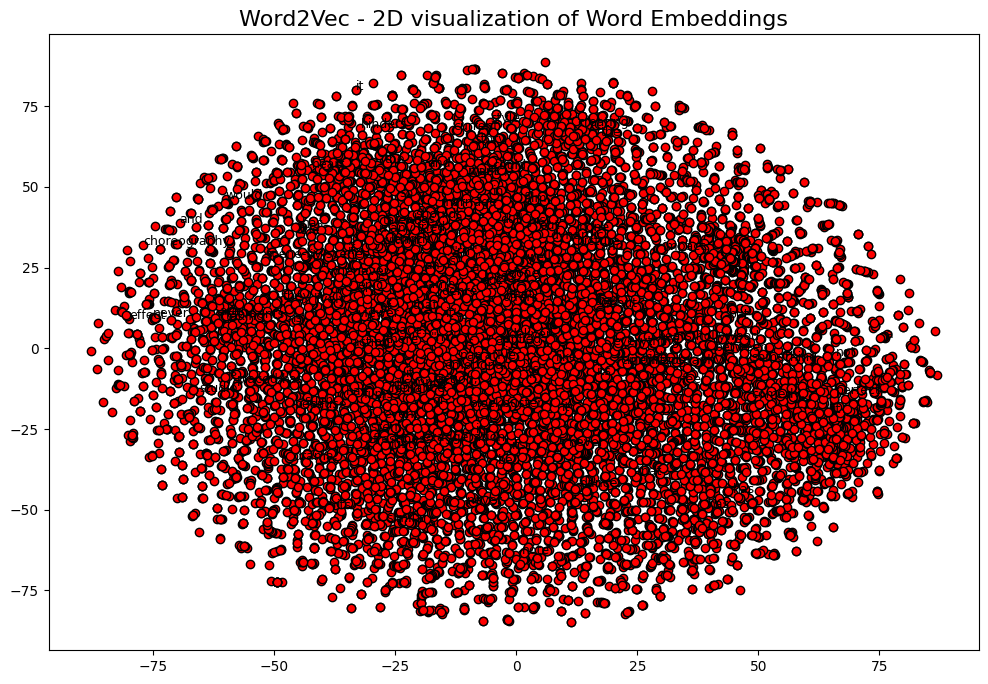

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
wor = list(model.wv.index_to_key)
word_vec = np.array([model.wv[word] for word in wor])
tsne = TSNE(n_components=2, random_state=42)
word_vec_2d = tsne.fit_transform(word_vec)
#Plotting the word embeddings
plt.figure(figsize=(12, 8))
plt.scatter(word_vec_2d[:, 0], word_vec_2d[:, 1], edgecolors='k', c='r')
for i, word in enumerate(words):
    plt.annotate(word, (word_vec_2d[i, 0], word_vec_2d[i, 1]), fontsize=9)

plt.title('Word2Vec - 2D visualization of Word Embeddings', fontsize=16)
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
'''
# The GitHub link of your final csv file


# Link:https://github.com/Gnani0825/Pendyala_Gnaneshwar_ASSIGN_04_CSV/blob/main/anil_reviews.csv
#
'''


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
'''
# it is very challenging one though i had the little idea about the concepts it made me to do a lot of reasearch about the topics and i was new to this machine learning concepts so it was very interesting to know new things and i am more exited to look in depth concepts and excel in the subject future
'''